In [1]:
import pandas as pd

%matplotlib inline

playGs = pd.read_csv("playgrondData.csv")
playGs.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817


In [2]:
firearms = pd.read_csv("firearmSeizures.csv")
firearms.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [3]:
neighborhoods_playgrounds = {}
neighborhoods_firearms = {}
neighborhoods = {}

In [4]:
firearm_weight = 1
        
for elem in firearms["neighborhood"]:
    try:
        neighborhoods[elem] += 1 * firearm_weight
        neighborhoods_firearms[elem] += 1
    except KeyError:
        neighborhoods[elem] = 1 * firearm_weight
        neighborhoods_firearms[elem] = 1

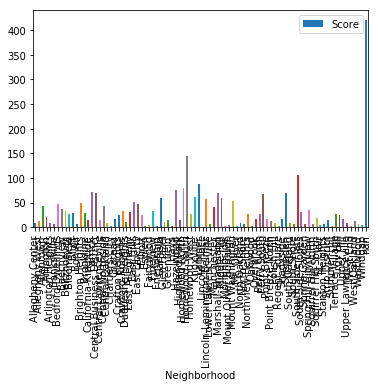

In [5]:
firearm_df = pd.DataFrame(list(neighborhoods_firearms.items()))
firearm_df.columns = ['Neighborhood', 'Score'] 
firearm_df = firearm_df.sort_values('Neighborhood')
firearm_df.plot.bar(x = 'Neighborhood', y = 'Score')

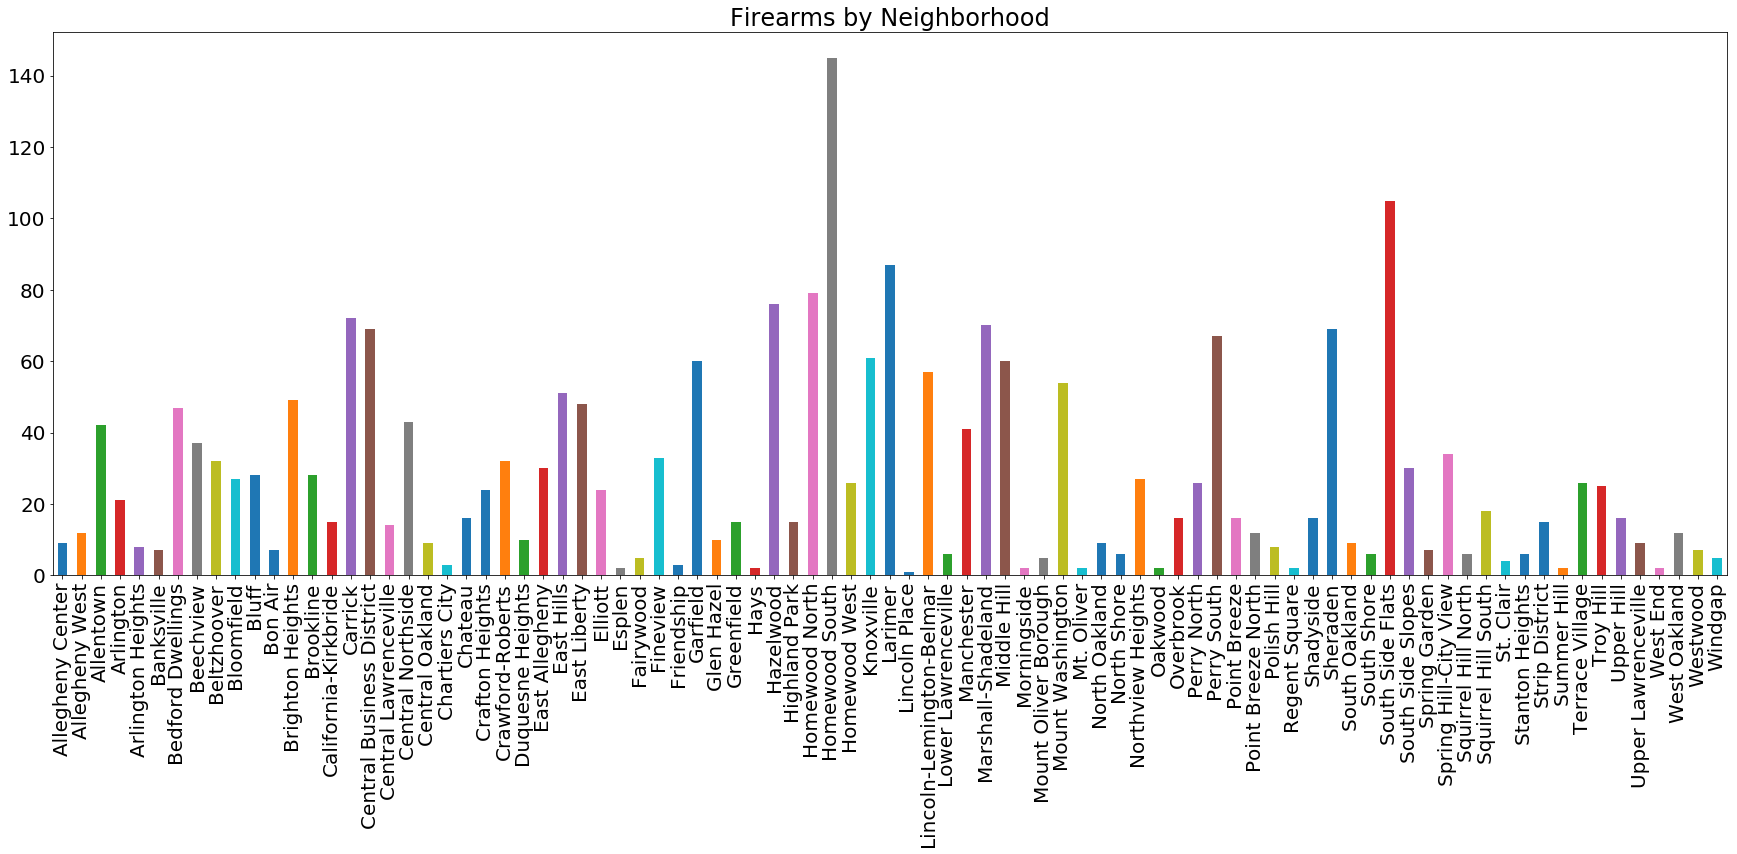

In [77]:
plt.rcParams.update({'font.size': 20})
firearms['neighborhood'].value_counts().sort_index().plot(figsize = (30, 10), kind = 'bar', title = "Firearms by Neighborhood")

In [6]:
for elem in playGs["neighborhood"]:
    try:
        neighborhoods_playgrounds[elem] += 1
    except KeyError:
        neighborhoods_playgrounds[elem] = 1

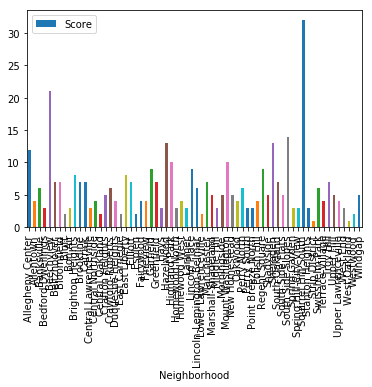

In [7]:
playground_df = pd.DataFrame(list(neighborhoods_playgrounds.items()))
playground_df.columns = ['Neighborhood', 'Score'] 
playground_df = playground_df.sort_values('Neighborhood')
playground_df.plot.bar(x = 'Neighborhood', y = 'Score')

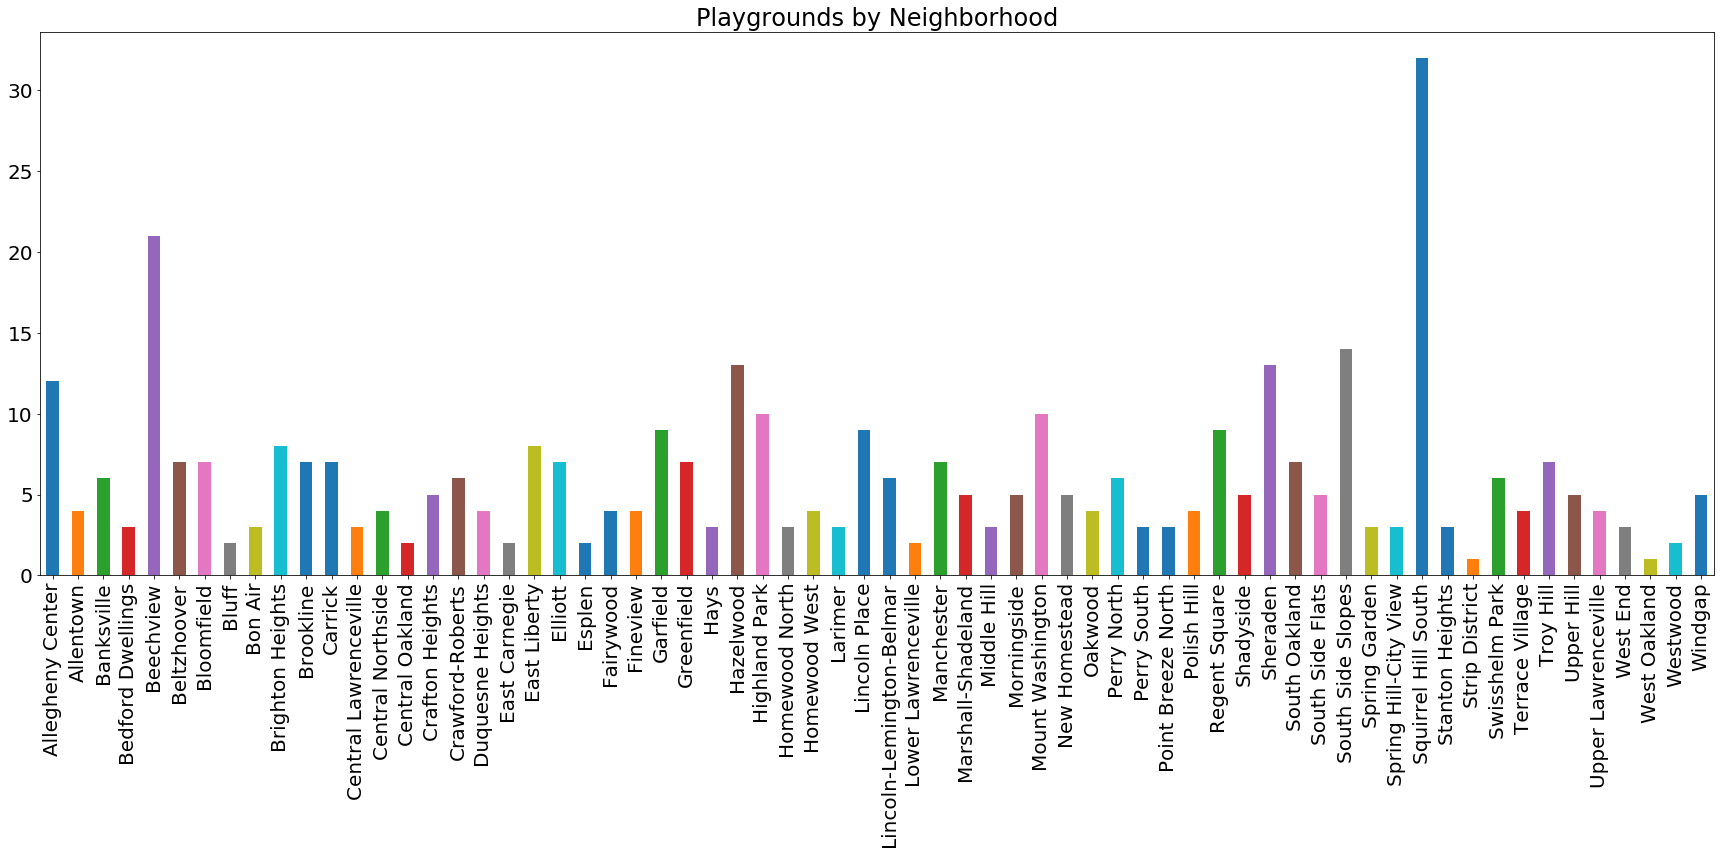

In [78]:
plt.rcParams.update({'font.size': 20})
playGs['neighborhood'].value_counts().sort_index().plot(figsize = (30, 10), kind = 'bar', title = "Playgrounds by Neighborhood")

In [8]:
playground_weight = float(firearm_df.mean()) / float(playground_df.mean())

print(playground_weight)

for elem in playGs["neighborhood"]:
    try:
        neighborhoods[elem] += 1 * playground_weight
    except KeyError:
        neighborhoods[elem] = 1 * playground_weight

5.274746192893401


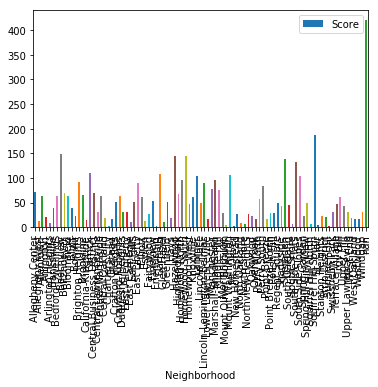

In [9]:
df = pd.DataFrame(list(neighborhoods.items()))
df.columns = ['Neighborhood', 'Score'] 
df = df.sort_values('Neighborhood')
df.plot.bar(x = 'Neighborhood', y = 'Score')

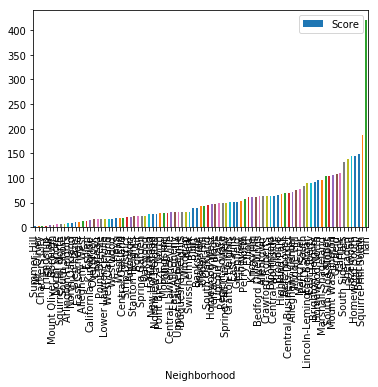

In [10]:
df = df.sort_values('Score')
df.plot.bar(x = 'Neighborhood', y = 'Score')
##Graph mat plotlib

In [11]:
df.tail()

,Neighborhood,Score
15,Hazelwood,144.571701
16,Homewood South,145.000000
9,Beechview,147.769670
69,Squirrel Hill South,186.791878
4,NaN,420.000000


In [12]:

firearm_weight = 1

neighborhoods = {}
neighborhoods_firearms = {}
neighborhoods_playgrounds = {}
        
for elem in firearms["neighborhood"]:
    try:
        neighborhoods[elem] += 1 * firearm_weight
        neighborhoods_firearms[elem] += 1
    except KeyError:
        neighborhoods[elem] = 1 * firearm_weight
        neighborhoods_firearms[elem] = 1

for elem in playGs["neighborhood"]:
    try:
        neighborhoods_playgrounds[elem] += 1
    except KeyError:
        neighborhoods_playgrounds[elem] = 1

firearm_df = pd.DataFrame(list(neighborhoods_firearms.items()))
firearm_df = firearm_df.dropna()
playground_df = pd.DataFrame(list(neighborhoods_playgrounds.items()))
playground_df = playground_df.dropna()

playground_weight = float(firearm_df.mean()) / float(playground_df.mean())

print("playground weight:", playground_weight)

for elem in playGs["neighborhood"]:
    try:
        neighborhoods[elem] += 1 * playground_weight
    except KeyError:
        neighborhoods[elem] = 1 * playground_weight

df = pd.DataFrame(list(neighborhoods.items()))
df = df.dropna()
df.columns = ['Neighborhood', 'Score'] 
df = df.sort_values('Score')

df.tail(10)

playground weight: 4.526693506038859


,Neighborhood,Score
13,Mount Washington,99.266935
31,Larimer,100.580081
39,Garfield,100.740242
26,Carrick,103.686855
14,South Side Flats,127.633468
1,Sheraden,127.847016
9,Beechview,132.060564
15,Hazelwood,134.847016
16,Homewood South,145.000000
69,Squirrel Hill South,162.854192


Filtered Dictionary : 
{'Sheraden': 127.8470155785051, nan: 420, 'Marshall-Shadeland': 92.63346753019427, 'Beechview': 132.06056362681596, 'Mount Washington': 99.26693506038855, 'South Side Flats': 127.63346753019427, 'Hazelwood': 134.8470155785051, 'Homewood South': 145, 'Homewood North': 92.58008051811656, 'Carrick': 103.68685454227197, 'Larimer': 100.58008051811656, 'Garfield': 100.74024155434968, 'South Side Slopes': 93.373709084544, 'Squirrel Hill South': 162.85419219324348}


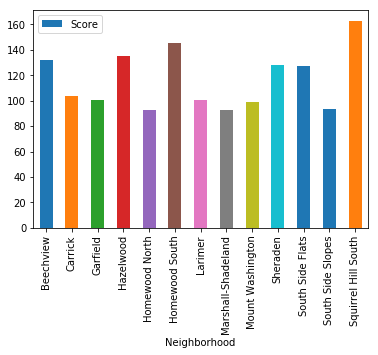

In [15]:
filter_neighborhood = dict()

for (key, value) in neighborhoods.items():
   # Check if key is even then add pair to new dictionary
   if value > 90:
       filter_neighborhood[key] = value
 
print('Filtered Dictionary : ')
print(filter_neighborhood)


df = pd.DataFrame(list(filter_neighborhood.items()))
df = df.dropna()
df.columns = ['Neighborhood', 'Score'] 
df = df.sort_values('Neighborhood')
df.plot.bar(x = 'Neighborhood', y = 'Score')